In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import glob
import os,sys
# Import Python Libraries
import iris
import iris.plot as iplt
from iris.analysis import MEAN, MAX, SUM, COUNT
import copy
from collections import  OrderedDict

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)

acpc_workspace='/group_workspaces/jasmin2/acpc'
sys.path.append('/home/users/pmarinescu/acpc_intercomparison_3')
sys.path.append('/home/users/pmarinescu')
from acpc_intercomparison import load_variable_cube,color,variable_names,directory,filename
#from Setup_intercomparison import load_variable_cube,color,variable_names,directory,filename
from collections import  OrderedDict

In [3]:
# COSMO_KIT  MesoNH_Toulouse  RAMS_CSU  UM_LEEDS  WRF_NASA  WRF_OXF  WRF_PNNL
models = []
models.append('COSMO_KIT')
models.append('MesoNH_Toulouse')
models.append('RAMS_CSU')
models.append('UM_LEEDS')
models.append('WRF_NASA')
models.append('WRF_OXF')
models.append('WRF_PNNL')

mn = OrderedDict()
mn['COSMO_KIT'] = ['COSMO']
mn['MesoNH_Toulouse'] = ['MesoNH']
mn['RAMS_CSU'] = ['RAMS']
mn['UM_LEEDS'] = ['UM']
mn['WRF_NASA'] = ['NU-WRF']
mn['WRF_OXF'] = ['WRF-Morr']
mn['WRF_PNNL'] = ['WRF-SBM']

dx = '500m'
dt = '5m'


In [4]:
#np.nanmax(t_avg_p[model][tf])

QCLD


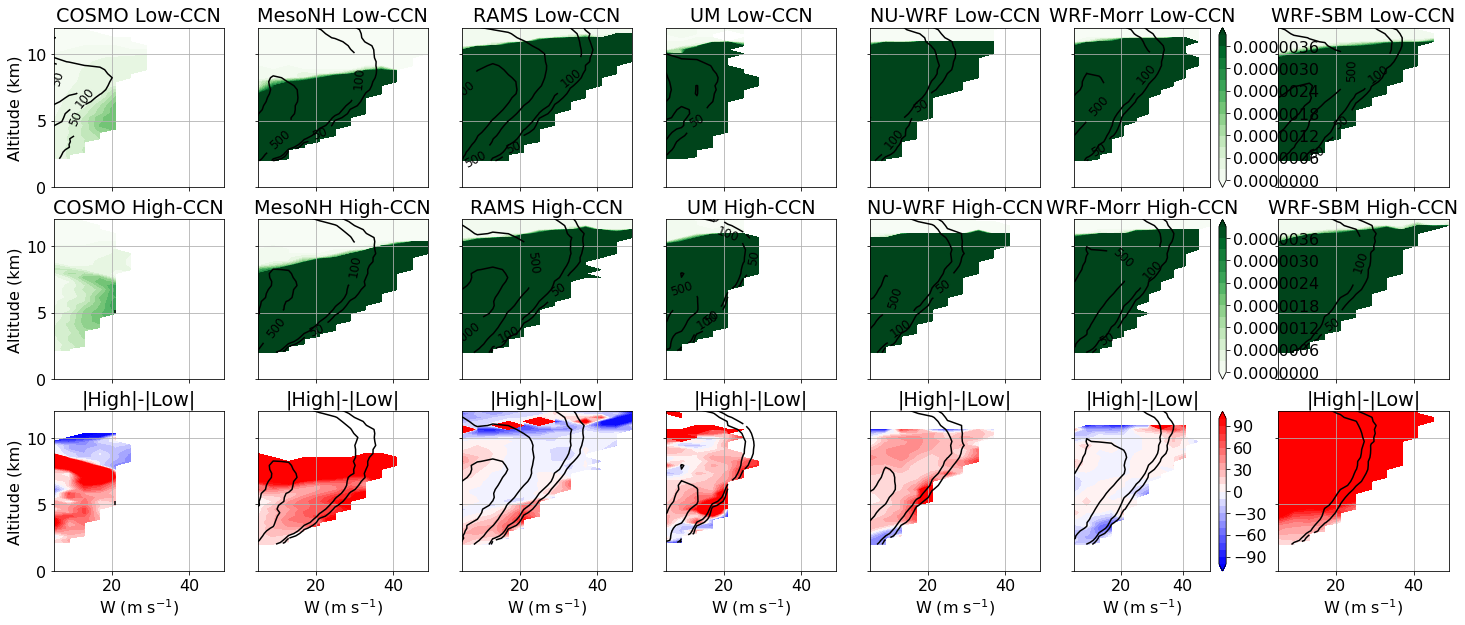

In [5]:
w_mid_c = OrderedDict()
alt_c = OrderedDict()
t_avg_c = OrderedDict()
w_cnt_c = OrderedDict()
w_avg_c = OrderedDict()
w_med_c = OrderedDict()
w_75_c = OrderedDict()

w_mid_p = OrderedDict()
alt_p = OrderedDict()
t_avg_p = OrderedDict()
w_cnt_p = OrderedDict()
w_avg_p = OrderedDict()
w_med_p = OrderedDict()
w_75_p = OrderedDict()
for model in models:
    w_mid_c[model] = OrderedDict()
    alt_c[model] = OrderedDict()
    t_avg_c[model] = OrderedDict()
    w_cnt_c[model] = OrderedDict()
    w_avg_c[model] = OrderedDict()
    w_med_c[model] = OrderedDict()
    w_75_c[model] = OrderedDict()

    w_mid_p[model] = OrderedDict()
    alt_p[model] = OrderedDict()
    t_avg_p[model] = OrderedDict()
    w_cnt_p[model] = OrderedDict()
    w_avg_p[model] = OrderedDict()
    w_med_p[model] = OrderedDict()
    w_75_p[model] = OrderedDict()
    
tf = 'QCLD'; 
t_lvls = np.arange(0,4.0001,0.3)/1000;
#t_lvls = np.arange(1,4000,200)*1000000;
t_lvls = np.arange(0,4.0001,0.3)/1000/1000;

import pickle
thresh = 0.0001

plot_dir = '/group_workspaces/jasmin2/acpc/public/pmarin/Manuscript/'
os.makedirs(plot_dir,exist_ok=True)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

c_lvls = [0,50,100,500,1000,5000,10000,15000,20000]

print(tf)
fig,ax = plt.subplots(3,7,figsize=(25,10))
cntm = 0
    
for model in models:
    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/POL/'+dx+'/'+dt+'/'
    [w_mid_p[model][tf],alt_p[model][tf],t_avg_p[model][tf],w_cnt_p[model][tf],w_avg_p[model][tf],w_med_p[model][tf],w_75_p[model][tf]] = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))

    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/CLN/'+dx+'/'+dt+'/'
    [w_mid_c[model][tf],alt_c[model][tf],t_avg_c[model][tf],w_cnt_c[model][tf],w_avg_c[model][tf],w_med_c[model][tf],w_75_c[model][tf]] = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
    
    if model == 'COSMO_KIT':
        scale_factor = 1./3600.;
    else:
        scale_factor = 1.
    
    # CLEAN Simulation Plot
    a = ax[0,cntm].contourf(w_mid_c[model][tf],alt_c[model][tf]/1000,np.transpose(t_avg_c[model][tf]*scale_factor),levels=t_lvls,cmap=plt.cm.Greens,extend='both')

    if cntm == 5:
        plt.colorbar(a,ax=ax[0,cntm])

    b = ax[0,cntm].contour(w_mid_c[model][tf],alt_c[model][tf]/1000,np.transpose(w_cnt_c[model][tf]),colors='k',levels=c_lvls)
    ax[0,cntm].clabel(b,fmt='%1.0f',fontsize=12)
    ax[0,cntm].set_ylim([0,12])
    ax[0,cntm].grid()
    ax[0,cntm].set_title(mn[model][0]+' Low-CCN')
    ax[0,cntm].set_xticklabels('')

    # POL Simulation Plot
    a = ax[1,cntm].contourf(w_mid_p[model][tf],alt_p[model][tf]/1000,np.transpose(t_avg_p[model][tf]*scale_factor),levels=t_lvls,cmap=plt.cm.Greens,extend='both')
    if cntm == 5:
        plt.colorbar(a,ax=ax[1,cntm])

    b = ax[1,cntm].contour(w_mid_p[model][tf],alt_p[model][tf]/1000,np.transpose(w_cnt_p[model][tf]),colors='k',levels=c_lvls)
    ax[1,cntm].clabel(b,fmt='%1.0f',fontsize=12)
    ax[1,cntm].set_ylim([0,12])
    ax[1,cntm].grid()
    ax[1,cntm].set_title(mn[model][0]+' High-CCN')
    ax[1,cntm].set_xticklabels('')

    plt_data = (np.abs(t_avg_p[model][tf]) - np.abs(t_avg_c[model][tf]))/ np.abs(t_avg_c[model][tf]) * 100
    
    import numpy.ma as ma
    plt_data = ma.masked_where(w_cnt_p[model][tf] < 1, plt_data)
    plt_data = ma.masked_where(w_cnt_c[model][tf] < 1, plt_data)
    plt_data = ma.masked_where(t_avg_c[model][tf]*t_avg_p[model][tf] < 0, plt_data)

    # Difference Simulation Plot
    a = ax[2,cntm].contourf(w_mid_p[model][tf],alt_p[model][tf]/1000,np.transpose(plt_data),cmap=plt.cm.bwr,extend='both', levels = np.arange(-100,101,10))
    b = ax[2,cntm].contour(w_mid_p[model][tf],alt_p[model][tf]/1000,np.transpose(w_cnt_p[model][tf]),colors='k',levels=c_lvls)
    if cntm == 5:
        plt.colorbar(a,ax=ax[2,cntm])    
    ax[2,cntm].set_ylim([0,12])
    ax[2,cntm].set_xlabel('W (m s$^{-1}$)')
    ax[2,cntm].grid()
    ax[2,cntm].set_title('|High|-|Low|')

    if cntm == 0:
        for yy in np.arange(0,3):
            ax[yy,cntm].set_ylabel('Altitude (km)')
    else:
        for yy in np.arange(0,3):
            ax[yy,cntm].set_yticklabels('')

    cntm = cntm + 1

#plt.tight_layout()
#plt.savefig(plot_dir+'xColor_AllModels_'+tf+'_'+str(thresh)+'_np3_310_75pct.png')

QCLD


FileNotFoundError: [Errno 2] No such file or directory: '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/COSMO_KIT/POL/500m/5m/CFAD_QCLD_0.0001_np3_310_75pct.p'

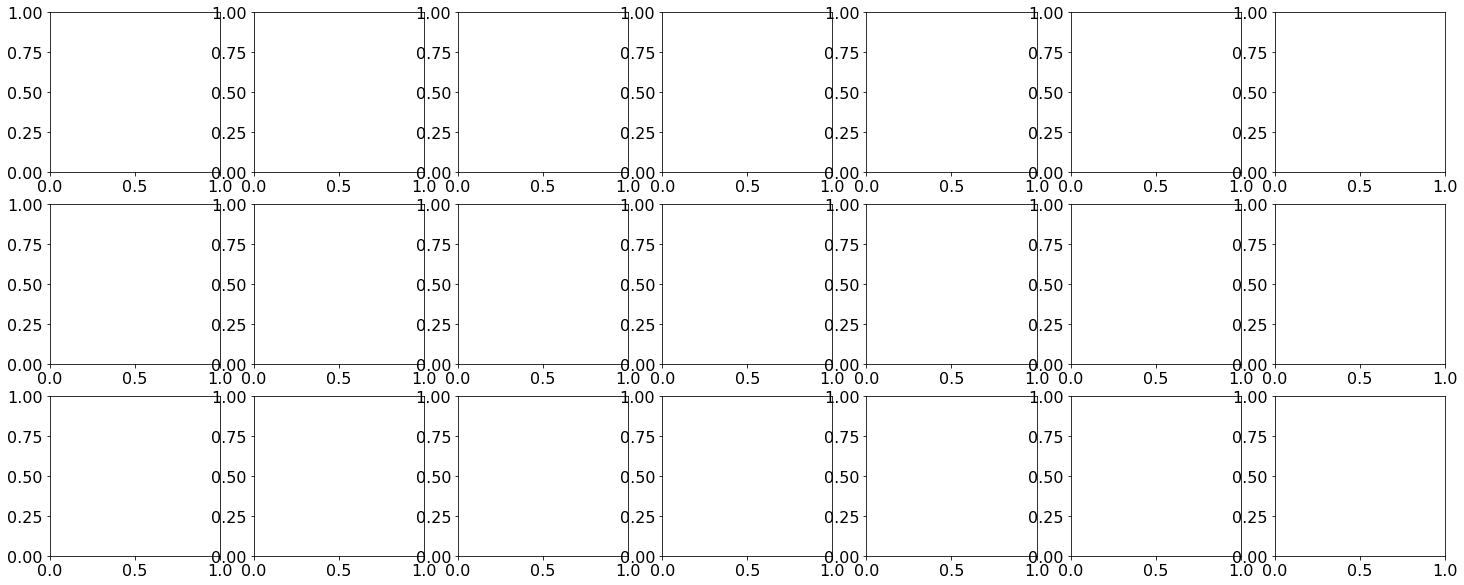

In [6]:
w_mid_c = OrderedDict()
alt_c = OrderedDict()
t_avg_c = OrderedDict()
w_cnt_c = OrderedDict()
w_avg_c = OrderedDict()

w_mid_p = OrderedDict()
alt_p = OrderedDict()
t_avg_p = OrderedDict()
w_cnt_p = OrderedDict()
w_avg_p = OrderedDict()

for model in models:
    w_mid_c[model] = OrderedDict()
    alt_c[model] = OrderedDict()
    t_avg_c[model] = OrderedDict()
    w_cnt_c[model] = OrderedDict()
    w_avg_c[model] = OrderedDict()
    
    w_mid_p[model] = OrderedDict()
    alt_p[model] = OrderedDict()
    t_avg_p[model] = OrderedDict()
    w_cnt_p[model] = OrderedDict()
    w_avg_p[model] = OrderedDict()
    
terms = ['QCLD','QRAIN']; 
t_lvls = np.arange(0,4.0001,0.3)/1000;

import pickle
thresh = 0.0001

plot_dir = '/group_workspaces/jasmin2/acpc/public/pmarin/UPDRAFTS/W_CFADS/'
os.makedirs(plot_dir,exist_ok=True)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

c_lvls = [0,50,100,500,1000,5000,10000,15000,20000]
ylims = [2,13]
print(tf)
fig,ax = plt.subplots(3,7,figsize=(25,10))
cntm = 0

for t in np.arange(0,len(terms)):
    tf = terms[t]
    for model in models:
        savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/POL/'+dx+'/'+dt+'/'
        [w_mid_p[model][tf],alt_p[model][tf],t_avg_p[model][tf],w_cnt_p[model][tf],w_avg_p[model][tf]] = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_np3_310_75pct.p'),"rb"))

        savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/CLN/'+dx+'/'+dt+'/'
        [w_mid_c[model][tf],alt_c[model][tf],t_avg_c[model][tf],w_cnt_c[model][tf],w_avg_c[model][tf]] = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_np3_310_75pct.p'),"rb"))

for model in models:
    # CLEAN Simulation Plot
    a = ax[0,cntm].contourf(w_mid_c[model][tf],alt_c[model][tf]/1000,np.transpose(t_avg_c[model][terms[0]]+t_avg_c[model][terms[1]]),levels=t_lvls,cmap=plt.cm.Greens,extend='both')

    if cntm == 6:
        plt.colorbar(a,ax=ax[0,cntm])

    b = ax[0,cntm].contour(w_mid_c[model][tf],alt_c[model][tf]/1000,np.transpose(w_cnt_c[model][tf]),colors='k',levels=c_lvls)
    ax[0,cntm].clabel(b,fmt='%1.0f',fontsize=12)
    ax[0,cntm].set_ylim(ylims)
    ax[0,cntm].grid()
    ax[0,cntm].set_title(mn[model][0]+' Low-CCN')
    ax[0,cntm].set_xticklabels('')

    # POL Simulation Plot
    a = ax[1,cntm].contourf(w_mid_p[model][tf],alt_p[model][tf]/1000,np.transpose(t_avg_p[model][terms[0]]+t_avg_p[model][terms[1]]),levels=t_lvls,cmap=plt.cm.Greens,extend='both')
    if cntm == 6:
        plt.colorbar(a,ax=ax[1,cntm])

    b = ax[1,cntm].contour(w_mid_p[model][tf],alt_p[model][tf]/1000,np.transpose(w_cnt_p[model][tf]),colors='k',levels=c_lvls)
    ax[1,cntm].clabel(b,fmt='%1.0f',fontsize=12)
    ax[1,cntm].set_ylim(ylims)
    ax[1,cntm].grid()
    ax[1,cntm].set_title(mn[model][0]+' High-CCN')
    ax[1,cntm].set_xticklabels('')

    plt_data = (np.abs(t_avg_p[model][terms[0]]+t_avg_p[model][terms[1]]) - np.abs(t_avg_c[model][terms[0]]+t_avg_c[model][terms[1]]))/ np.abs(t_avg_c[model][terms[0]]+t_avg_c[model][terms[1]]) * 100

    import numpy.ma as ma
    plt_data = ma.masked_where(w_cnt_p[model][tf] < 1, plt_data)
    plt_data = ma.masked_where(w_cnt_c[model][tf] < 1, plt_data)
    plt_data = ma.masked_where(t_avg_c[model][tf]*t_avg_p[model][tf] < 0, plt_data)

    # Difference Simulation Plot
    a = ax[2,cntm].contourf(w_mid_p[model][tf],alt_p[model][tf]/1000,np.transpose(plt_data),cmap=plt.cm.bwr,extend='both', levels = np.arange(-70,71,2))
    b = ax[2,cntm].contour(w_mid_p[model][tf],alt_p[model][tf]/1000,np.transpose(w_cnt_p[model][tf]),colors='k',levels=c_lvls)
    if cntm == 6:
        plt.colorbar(a,ax=ax[2,cntm])    
    ax[2,cntm].set_ylim(ylims)
    ax[2,cntm].set_xlabel('W (m s$^{-1}$)')
    ax[2,cntm].grid()
    ax[2,cntm].set_title('|High|-|Low|')

    if cntm == 0:
        for yy in np.arange(0,3):
            ax[yy,cntm].set_ylabel('Altitude (km)')
    else:
        for yy in np.arange(0,3):
            ax[yy,cntm].set_yticklabels('')

    cntm = cntm + 1
    #plt.tight_layout()
    #plt.savefig(plot_dir+'xColor_AllModels_'+tf+'_'+str(thresh)+'_np3_310_75pct.png')
    #plt.savefig(plot_dir+'xColor_AllModels_'+str(thresh)+'_np3_310_75pct.png')